In [1]:
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D as ax
import numpy as np
get_ipython().magic('matplotlib inline')

In [2]:
import pandas as pd

In [3]:
def an(x,t):
    return(x+t+np.exp(t))
x1 = np.linspace(0,1,11)
t1 = np.linspace(0,1,11)
X,T = plt.meshgrid(x1, t1)
Z = an(X, T)
res = np.zeros((100,100))
for i in range(100):
    for k in range(100):
        res[i,k] = an(i,k)
print(x1)

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1. ]


In [4]:
q1 = np.zeros(11)
for k in range(11):
    q1[k] = an(k*0.1,1)

print (q1)

[ 3.71828183  3.81828183  3.91828183  4.01828183  4.11828183  4.21828183
  4.31828183  4.41828183  4.51828183  4.61828183  4.71828183]


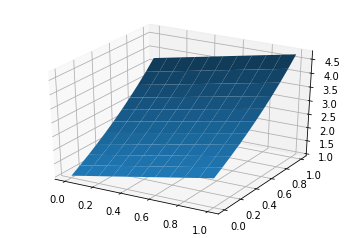

In [5]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, T, Z)
plt.show()

In [6]:
def num(L, N):
    
    x = np.zeros(L+1)
    t = np.zeros(N+1)
    tau = np.zeros(N+1)
    u = np.zeros((L+1,N+1))
    
    h = 1/L
    x[0] = 0
    for l in range(L+1):
        x[l] = h*l
        
    t[0]= 0
    tau = 1/N
    for n in range(N+1):
        t[n] = tau*n
        
    for l in range(0,L+1):
        u[l,0] = x[l] + 1
        
    for n in range(1,N+1):
        u[L,n] = np.exp(t[n])+t[n] -1
    
    
    for l in range(0,L):
        for n in range(0,N):
            u[l,n+1] = u[l,n]+ tau/h*(u[l+1,n]-u[l,n])+ tau*np.exp(t[n])
            
    
    return(x,t,u)


In [7]:
print (an(0,0.1))

1.20517091808


In [8]:
result = num(10,10)
q2 = result[2][10]

q3 = abs(q2-q1)

print (result)

(array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]), array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]), array([[ 1.        ,  1.2       ,  0.11051709,  0.12214028,  0.13498588,
         0.14918247,  0.16487213,  0.18221188,  0.20137527,  0.22255409,
         0.24596031],
       [ 1.1       ,  1.3       ,  0.11051709,  0.12214028,  0.13498588,
         0.14918247,  0.16487213,  0.18221188,  0.20137527,  0.22255409,
         0.24596031],
       [ 1.2       ,  1.4       ,  0.11051709,  0.12214028,  0.13498588,
         0.14918247,  0.16487213,  0.18221188,  0.20137527,  0.22255409,
         0.24596031],
       [ 1.3       ,  1.5       ,  0.11051709,  0.12214028,  0.13498588,
         0.14918247,  0.16487213,  0.18221188,  0.20137527,  0.22255409,
         0.24596031],
       [ 1.4       ,  1.6       ,  0.11051709,  0.12214028,  0.13498588,
         0.14918247,  0.16487213,  0.18221188,  0.20137527,  0.22255409,
         0.24596031],
       [ 

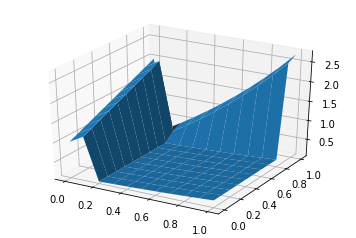

In [9]:
fig = plt.figure()
ax = fig.gca(projection='3d')
X,Y = plt.meshgrid(result[0], result[1])
ax.plot_surface(X, Y, result[2])
plt.show()

In [10]:
df = pd.DataFrame({'x' : x1, 'an' : q1,'num' : q2, 'abs' : q3})
display(df)

,abs,an,num,x
0,1.718282,3.718282,2.000000,0.0
1,3.613111,3.818282,0.205171,0.1
2,3.496879,3.918282,0.421403,0.2
3,3.368423,4.018282,0.649859,0.3
4,3.226457,4.118282,0.891825,0.4
5,3.069561,4.218282,1.148721,0.5
6,2.896163,4.318282,1.422119,0.6
7,2.704529,4.418282,1.713753,0.7
8,2.492741,4.518282,2.025541,0.8
9,2.258679,4.618282,2.359603,0.9
